### Import libraries

In [1]:
import xarray
from cartopy import crs as ccrs
import cartopy.feature as feature
import matplotlib.pyplot as plt
import cmocean

In [2]:
# read in NetCDF data
file = 'data/JRR-AOD_v2r1_npp_s201910292033094_e201910292034336_c201910292124400.nc'
ds = xarray.open_dataset(file)

In [3]:
ds.attrs

{'Conventions': 'CF-1.5',
 'Metadata_Conventions': 'CF-1.5, Unidata Dataset Discovery v1.0',
 'standard_name_vocabulary': 'CF Standard Name Table (version 17, 24 March 2011)',
 'project': 'JPSS Risk Reduction: Enterprise Aerosol Optical Depth/Particle Size Products',
 'institution': 'DOC/NOAA/NESDIS/NDE > S-NPP Data Exploitation, NESDIS, NOAA, U.S. Department of Commerce',
 'naming_authority': 'gov.noaa.nesdis.nde',
 'satellite_name': 'NPP',
 'instrument_name': 'VIIRS',
 'title': 'JRR-AOD',
 'summary': 'Enterprise Aerosol Optical Depth/ Aerosol Particle Size Products',
 'history': 'JRR-AOD v2r1',
 'processing_level': 'NOAA Level 2',
 'references': '',
 'id': 'bb5fddc5-7eb1-4db7-8151-d09f84635006',
 'Metadata_Link': 'JRR-AOD_v2r1_npp_s201910292033094_e201910292034336_c201910292124400.nc',
 'start_orbit_number': 41477,
 'end_orbit_number': 41477,
 'day_night_data_flag': 'day',
 'ascend_descend_data_flag': 0,
 'time_coverage_start': '2019-10-29T20:33:09Z',
 'time_coverage_end': '2019-10-2

In [4]:
ds.attrs['time_coverage_start']

'2019-10-29T20:33:09Z'

In [5]:
ds.attrs['time_coverage_end']

'2019-10-29T20:34:33Z'

In [6]:
ds.attrs['time_coverage_start']

'2019-10-29T20:33:09Z'

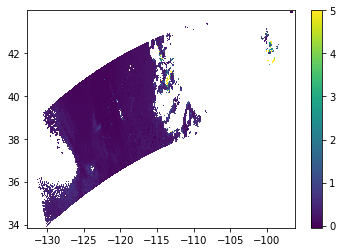

In [7]:
plt.pcolormesh(ds['Longitude'],
               ds['Latitude'], 
               ds['AOD550'])
plt.colorbar()
plt.show()

In [8]:
# using cartopy, create the map projection and plot the data
from_proj = ccrs.PlateCarree()
to_proj = ccrs.PlateCarree()
ax = plt.axes(projection = to_proj)
ax.coastlines()

# draw longitude and latitude tick marks
ax.set_xticks(range(-128,-118,2), crs=ccrs.PlateCarree())
ax.set_yticks(range(33,43), crs=ccrs.PlateCarree())

# use the "matter" palette from cmocean as the contour map
cmap = cmocean.cm.matter

# plot the color mesh/contour
plt.pcolormesh(ds['Longitude'],
               ds['Latitude'], 
               ds['AOD550'],
               transform = from_proj, vmax = 2,
               cmap = cmap)

# add a color bar for the aerosol optical depth
cbar = plt.colorbar(orientation = "horizontal", fraction = 0.07)
cbar.ax.set_xlabel('Aerosol Optical Depth')

# add title
plt.title('AOD over Kincade County on October 29, 2019 20:33 - 20:34')

# zoom in on data
plt.xlim(-128, -120)
plt.ylim(35, 42)

# show figure (uncomment below to show map in notebook instead)
# plt.show()

# save figure (uncomment to save map as image)
plt.savefig('Kincade_AOD_2019-10-29.png', dpi = 600)
plt.close()